In [ ]:
!pip install mne
import mne
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 5.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file='/content/drive/MyDrive/BCICIV_2a_gdf/A08T.gdf'

Mounted at /content/drive


In [ ]:

raw=mne.io.read_raw_gdf(file, preload=True, stim_channel='auto', verbose=False)
# Filter settings
low_cut = 4
hi_cut  = 40

raw_filt = raw.copy().filter(low_cut, hi_cut)
#raw.filter(4,40.,fir_design='firwin')
#raw.plot_psd(area_mode='range', tmax=10.0,average=False)
rawdata = raw_filt.get_data()
print(rawdata.shape)
events, event_id = mne.events_from_annotations(raw_filt)
print(events.shape[0])
LeftHand = []
RightHand = []
BothFeet = []
Tongue = []
for i in range(events.shape[0]-1):
  Data = rawdata[:,events[i,0]+125:events[i,0]+1125]
  if (events[i,2] == 7):
    LeftHand.append(Data)
  elif (events[i,2] == 8):
    RightHand.append(Data)
  elif (events[i,2] == 9):
     BothFeet.append(Data)
  elif (events[i,2] == 10):
     Tongue.append(Data)


LeftHand= np.delete(LeftHand, [22,23,24], 1)
RightHand = np.delete(RightHand, [22,23,24], 1)
BothFeet = np.delete(BothFeet, [22,23,24], 1)
Tongue= np.delete(Tongue, [22,23,24], 1)

print(LeftHand.shape)
print(RightHand.shape)
print(BothFeet.shape)
print(Tongue.shape)

def standardlizeSig(data):
  base = np.mean(data)
  std = np.std(data)
  standardlized_data = (data-base)/std
  del base, std
  return standardlized_data
# def standardlizeSig(data):
#   minft = data.min()
#   maxft = data.max()
#   standardlized_data= ((data - minft)/(maxft - minft))
#   return standardlized_data
# allLeftDataTF = []
# allRightDataTF = []
# allFootDataTF = []
# allTongueDataTF = []
# for i in range (BothFeet.shape[0]):
#   allLeftDataTF.append(standardlizeSig(LeftHand[i,:,:]))
#   allRightDataTF.append(standardlizeSig(RightHand[i,:,:]))
#   allFootDataTF.append(standardlizeSig(BothFeet[i,:,:]))
#   allTongueDataTF.append(standardlizeSig(Tongue[i,:,:]))
# allLeftDataTF = np.array(allLeftDataTF) # creates an array 
# allRightDataTF = np.array(allRightDataTF)
# allFootDataTF = np.array(allFootDataTF)
# allTongueDataTF = np.array(allTongueDataTF)

leftLabels = [0] * LeftHand.shape[0]
rightLabels = [1] * RightHand.shape[0]
footLabels = [2] * BothFeet.shape[0]
tongueLabels = [3] * Tongue.shape[0]
EntireClassLabels = leftLabels + rightLabels + footLabels + tongueLabels
EntireClassLabels = np.array(EntireClassLabels)
EntireClassData = np.concatenate((LeftHand, RightHand, BothFeet, Tongue))

#Standardize EEG signal
for i in range (EntireClassData.shape[0]):
  EntireClassData[i]=standardlizeSig(EntireClassData[i,:,:])

X_train, X_rem, Y_train, Y_rem = train_test_split(EntireClassData, EntireClassLabels, test_size=0.4, random_state=42)
X_validate,X_test,Y_validate,Y_test  = train_test_split(X_rem, Y_rem, test_size=0.1,random_state=42)

print (X_train.shape,X_validate.shape,X_test.shape)


/usr/local/lib/python3.7/dist-packages/mne/io/edf/edf.py:1155: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


(25, 675270)
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.3s finished


612
(72, 22, 1000)
(72, 22, 1000)
(71, 22, 1000)
(72, 22, 1000)
(172, 22, 1000) (103, 22, 1000) (12, 22, 1000)


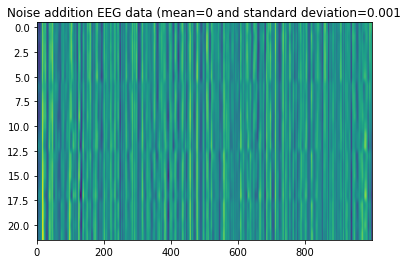

In [ ]:
mu=0.0
std =0.001 # for %5 Gaussian noise
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy,noise
NoisyData,noise=gaussian_noise(X_train[2],mu,std)


fig1 = plt.imshow(NoisyData,aspect='auto')
plt.title('Noise addition EEG data (mean=0 and standard deviation=0.001')
plt.show()
# fig2 = plt.imshow(X_train[1],aspect='auto')
# plt.title('Orignal EEG data')
# plt.show()
# fig3 = plt.imshow(NoisyData,aspect='auto')
# plt.title('Noise addition EEG data')
# plt.show()

In [ ]:
mu=0.0 # mean value
std =0.5 # standard deviation value
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

TrainData_temp=[]
TrainData_temp_label=[]
for i in range(X_train.shape[0]):
  NoisyData=gaussian_noise(X_train[i],mu,std)
  TrainData_temp.append(NoisyData)
  TrainData_temp_label.append(Y_train[i])


TrainData_temp=np.array(TrainData_temp)
TrainData_temp_label=np.array(TrainData_temp_label)
print(TrainData_temp.shape,TrainData_temp_label)


TrainData=np.concatenate((X_train,TrainData_temp))
TrainLabel=np.concatenate((Y_train,TrainData_temp_label))
print(TrainLabel.shape, TrainData.shape)



(172, 22, 1000) [1 0 1 1 1 1 2 1 2 1 2 2 2 3 1 1 0 3 3 1 2 3 3 3 2 0 2 1 2 0 0 0 1 3 3 0 1
 2 2 0 3 2 1 0 3 1 2 0 3 1 3 3 1 0 0 2 2 2 3 0 3 3 0 3 0 1 0 2 2 3 3 1 0 1
 1 3 3 0 3 0 0 2 2 0 1 3 2 0 3 3 1 0 3 3 2 0 0 1 3 3 2 2 0 3 2 2 3 3 0 1 0
 1 0 3 1 0 2 1 2 0 3 0 2 2 3 1 1 1 1 0 1 0 3 0 0 1 1 0 2 1 3 1 3 3 0 0 2 2
 2 2 0 0 3 3 0 2 2 3 2 1 2 1 1 2 1 3 0 2 0 1 3 1]
(344,) (344, 22, 1000)


In [ ]:
kernels, chans, samples = 1, 22, TrainData.shape[2]
TrainData1      = TrainData.reshape(TrainData.shape[0], chans, samples, kernels)
ValidData1  = X_validate.reshape(X_validate.shape[0], chans, samples, kernels)
TestData1  = X_test.reshape(X_test.shape[0], chans, samples, kernels)
TrainLabel1     = np_utils.to_categorical(TrainLabel)
ValidLabel1  = np_utils.to_categorical(Y_validate)
TestLabel1  = np_utils.to_categorical(Y_test)


In [ ]:
def square(x):
    return K.square(x)

def log(x):
    return K.log(K.clip(x, min_value = 1e-6, max_value = 10000))   


def ShallowConvNet(nb_classes=4, Chans = 22, Samples = 22, dropoutRate = 0.5):

    # start the model
    input_main   = Input((Chans, Samples, 1),name='Input for ShallowConvNet')
    block1       = Conv2D(40, (1, 25), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)),name='TemporalConvolution')(input_main)
    block1       = Conv2D(40, (Chans, 1), use_bias=False, 
                          kernel_constraint = max_norm(2., axis=(0,1,2)),name='SpatialFilter')(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9,name='BatchNormalization')(block1)
    block1       = Activation(square,name='SquareActivation')(block1)
    block1       = AveragePooling2D(pool_size=(1, 75), strides=(1, 15),name='MeanPooling')(block1)
    block1       = Activation(log, name='LogActivation')(block1)
    block1       = Dropout(dropoutRate,name='Dropoutlayer')(block1)
    flatten      = Flatten(name='FlattenLayer')(block1)
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5),name='DenseLayer')(flatten)
    softmax      = Activation('softmax',name='SoftmaxActivation')(dense)
    
    return Model(inputs=input_main, outputs=softmax)

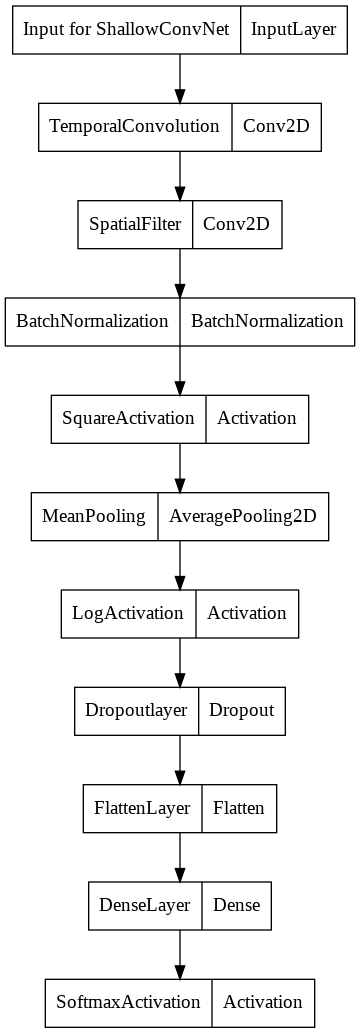

In [ ]:
model=ShallowConvNet(nb_classes=4, Chans = 22, Samples = 1000, dropoutRate = 0.5)
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)
#model.summary()

In [ ]:

#es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)
fittedModel = model.fit(TrainData1, TrainLabel1, batch_size = 64, epochs = 300, 
                        validation_data=(ValidData1, ValidLabel1))
                       
                        

Epoch 1/300
6/6 [==============================] - 5s 224ms/step - loss: 1.3606 - accuracy: 0.3634 - val_loss: 1.4139 - val_accuracy: 0.3301
Epoch 2/300
6/6 [==============================] - 0s 41ms/step - loss: 1.0477 - accuracy: 0.6453 - val_loss: 1.4402 - val_accuracy: 0.4078
Epoch 3/300
6/6 [==============================] - 0s 55ms/step - loss: 0.8298 - accuracy: 0.7238 - val_loss: 1.2605 - val_accuracy: 0.4660
Epoch 4/300
6/6 [==============================] - 0s 49ms/step - loss: 0.6796 - accuracy: 0.8110 - val_loss: 1.0503 - val_accuracy: 0.5146
Epoch 5/300
6/6 [==============================] - 0s 37ms/step - loss: 0.5537 - accuracy: 0.8605 - val_loss: 1.0231 - val_accuracy: 0.6019
Epoch 6/300
6/6 [==============================] - 0s 40ms/step - loss: 0.4371 - accuracy: 0.9186 - val_loss: 0.9861 - val_accuracy: 0.6019
Epoch 7/300
6/6 [==============================] - 0s 47ms/step - loss: 0.3781 - accuracy: 0.9273 - val_loss: 0.9346 - val_accuracy: 0.6408
Epoch 8/300
6/6 [==

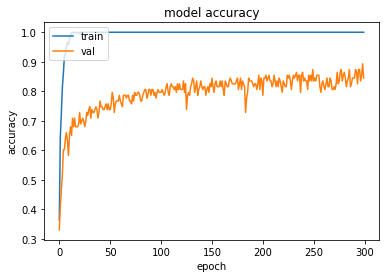

In [ ]:
plt.plot(fittedModel.history['accuracy'])
plt.plot(fittedModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

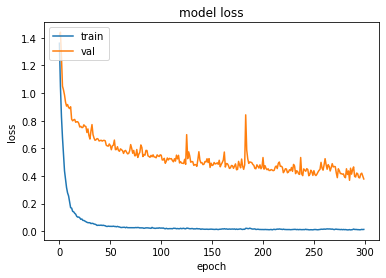

In [ ]:
plt.plot(fittedModel.history['loss'])
plt.plot(fittedModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(np.mean(fittedModel.history['val_accuracy']))

0.7949838214119276


In [ ]:
model.evaluate(TestData1, TestLabel1)
print(TestData1.shape,TestLabel1.shape)

1/1 [==============================] - 0s 67ms/step - loss: 0.8178 - accuracy: 0.7500
(12, 22, 1000, 1) (12, 4)


In [ ]:
predictions = model.predict(TestData1)
pred_classes = np.argmax(predictions, axis = 1)
actual_classes = np.argmax(TestLabel1, axis = 1)
print(pred_classes, actual_classes)


[2 3 0 0 1 3 1 1 1 2 3 0] [2 3 2 0 1 3 1 3 2 2 3 0]


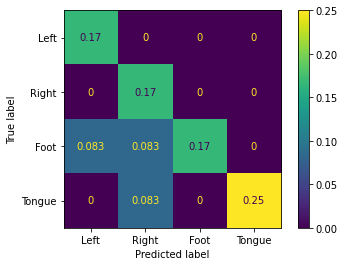

The accuracy is 75.0 %


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual_classes, pred_classes,normalize = 'all')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Left','Right','Foot','Tongue'])

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(actual_classes, pred_classes)
print('The accuracy is',Accuracy*100, '%')